In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.__version__


superStoreDF = pd.read_csv('Superstore.csv')

In [2]:
superStoreDF.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [3]:
#show headers
superStoreDF.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
#Check for any null values
superStoreDF.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
superStoreDF['Order Date'] = pd.to_datetime(superStoreDF['Order Date'], format='%m/%d/%Y')
superStoreDF['Ship Date'] = pd.to_datetime(superStoreDF['Ship Date'], format='%m/%d/%Y')

#make columns year-month for order and ship
superStoreDF['order_month_year'] = superStoreDF['Order Date'].dt.to_period('m')
superStoreDF['ship_month_year'] = superStoreDF['Ship Date'].dt.to_period('m')


In [16]:
# What is the Average Sale per month for the store?

#New Data frame
monthly_sales = pd.DataFrame(superStoreDF.groupby('order_month_year')[['Quantity','Sales']].sum()).reset_index()

monthly_sales.head()


,order_month_year,Quantity,Sales
0,2014-01,284,14236.895
1,2014-02,159,4519.892
2,2014-03,585,55691.009
3,2014-04,536,28295.345
4,2014-05,466,23648.287


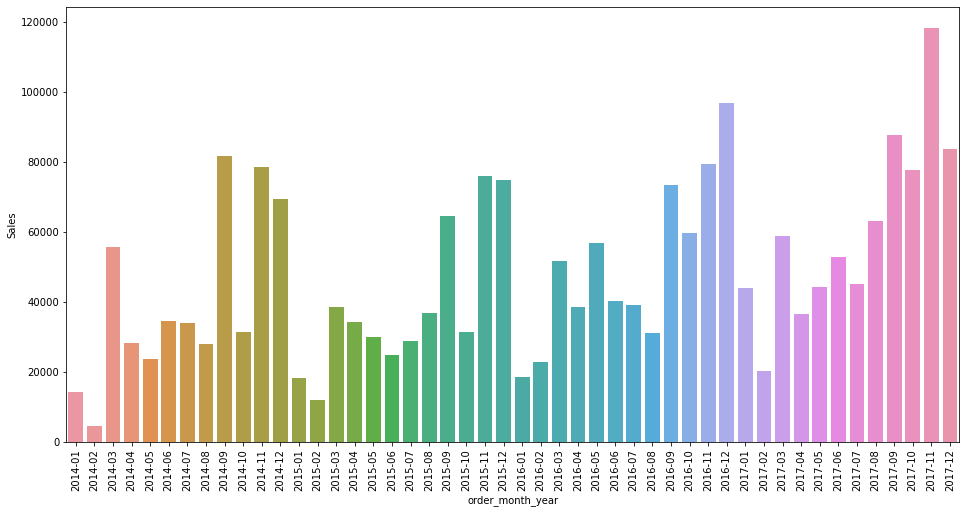

In [19]:
#Visualizing the data
plt.figure(figsize=(16, 8))
sns.barplot(x = 'order_month_year', y = 'Sales',data = monthly_sales)
plt.xticks(rotation=90)
plt.show()

In [25]:
# Q2: Whats is top demanded product United States?

top_demand = pd.DataFrame(superStoreDF.groupby(['Product Name', 'Category']) ['Quantity'].sum()).reset_index()
top_demand.sort_values(by='Quantity', ascending=False, inplace=True)
top_demand.head()

,Product Name,Category,Quantity
1499,Staples,Office Supplies,215
1493,Staple envelope,Office Supplies,170
537,Easy-staple paper,Office Supplies,150
1500,Staples in misc. colors,Office Supplies,86
942,KI Adjustable-Height Table,Furniture,74


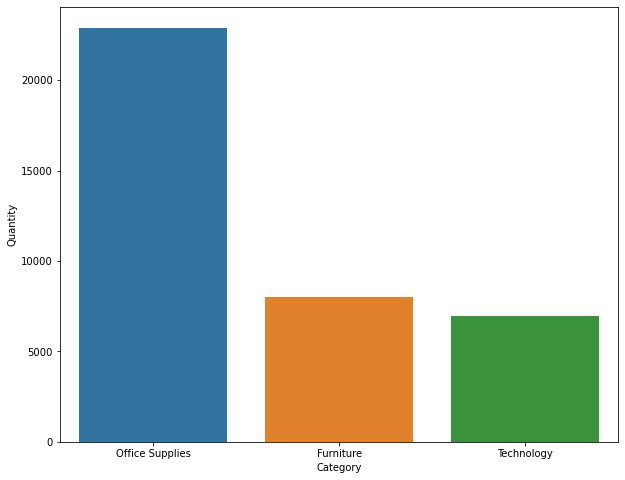

In [28]:
top_category  = pd.DataFrame(top_demand.groupby('Category')['Quantity'].sum()).reset_index()
top_category.sort_values(by='Quantity', ascending=False, inplace=True)

#Visualizing the data
plt.figure(figsize=(10, 8))
sns.barplot(data=top_category, x="Category",y = 'Quantity')
plt.show()

In [ ]:
#Answer is: Office Supplies

In [30]:
# Q3: Which City in US demand most of our goods and Which city our most profit come from?

top_city = pd.DataFrame(superStoreDF.groupby('City')[['Quantity', 'Profit']].sum()).reset_index()
top_city.sort_values(by='Quantity', ascending=False, inplace=True)
top_city.head()

,City,Quantity,Profit
329,New York City,3417,62036.9837
266,Los Angeles,2879,30440.7579
374,Philadelphia,1981,-13837.7674
438,San Francisco,1935,17507.3854
452,Seattle,1590,29156.0967


In [ ]:
# Answer: New York City

In [37]:
# Q4: Which State in US demand most of our goods and Which State our most profit come from?

top_state = pd.DataFrame(superStoreDF.groupby('State')[['Quantity', 'Profit']].sum()).reset_index()
top_state.sort_values(by='Quantity', ascending=False, inplace=True)
top_state.head()

,State,Quantity,Profit
3,California,7667,76381.3871
30,New York,4224,74038.5486
41,Texas,3724,-25729.3563
36,Pennsylvania,2153,-15559.9603
45,Washington,1883,33402.6517


In [ ]:
#Solution: California

<AxesSubplot:>

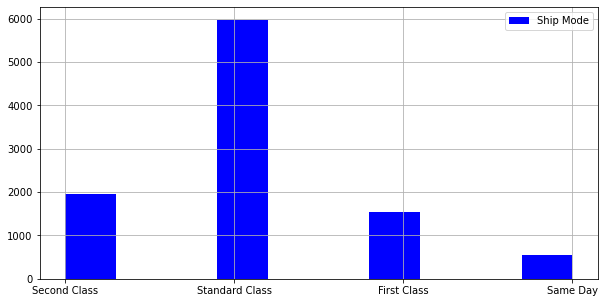

In [39]:
# Favorite Shipping Method
superStoreDF['Ship Mode'].hist(figsize=(10, 5), legend=True, color='blue')

In [ ]:
# Answer: Standard Class

In [59]:
#What is the total sales by region?

top_region = pd.DataFrame(superStoreDF.groupby('Region')[['Sales']].sum()).reset_index()
top_region.sort_values(by= 'Sales', ascending=False, inplace=True)

top_region.head()

,Region,Sales
3,West,725457.8245
1,East,678781.2400
0,Central,501239.8908
2,South,391721.9050


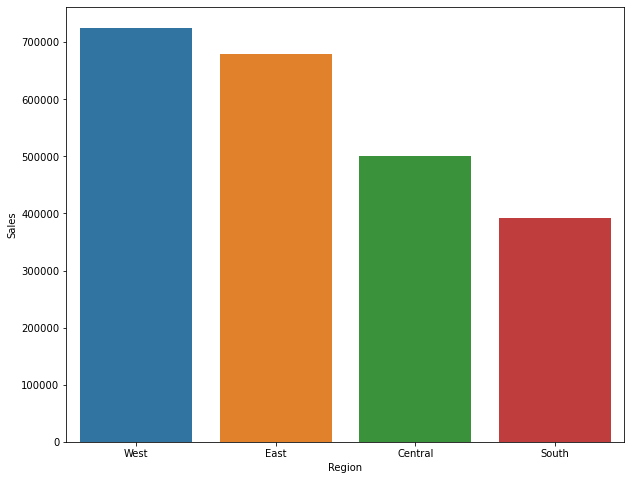

In [58]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_region, x="Region",y = 'Sales')
plt.show()